 ### CUSTOMER CHRN ANALYSIS (EDA)

In [1]:
#import the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

**Load the dataset**

In [2]:
df = pd.read_excel(r"C:\Users\FEMI ADEJUMO\Desktop\PERSONAL DATA SCIENCE PROJECTS\POWER BI PROJECT\Pwc Power BI Project\02 Churn-Dataset.xlsx")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,0,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes


**Check the various attribute of the dataset like shape,columns, datatypes e.t.c**

In [4]:
df.shape

(7043, 23)

In [5]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'numAdminTickets', 'numTechTickets', 'Churn'],
      dtype=object)

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
numAdminTickets       int64
numTechTickets        int64
Churn                object
dtype: object

The *TotalCharges column* is showing a wrong datatype. its expected to be a numerical type so we will transform this later on.

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,numAdminTickets,numTechTickets
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,0.515689,0.419566
std,0.368612,24.559481,30.090047,1.275299,1.250117
min,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,0.000000,0.000000
75%,0.000000,55.000000,89.850000,0.000000,0.000000
max,1.000000,72.000000,118.750000,5.000000,9.000000


*-SeniorCitizen is a categorical variable so we'll ignore the statistic for this column*

*-The average tenure of a customer is 32 months*

*-Average Monthly Charges is USD 64 and less than 25 percent of customers pay above $89 as monthly charges.*

*-less than 0.2 percent of customers raised issue ticket*

In [8]:
#Quick inspection of target variable 
df['Churn'].value_counts()/len(df)*100

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

*The data shows that 26.5 percent of customer churned*

*-This number is high and our objective is to know the factors that have contributed to this high churned rate*

Text(0.5, 1.0, 'count of customer')

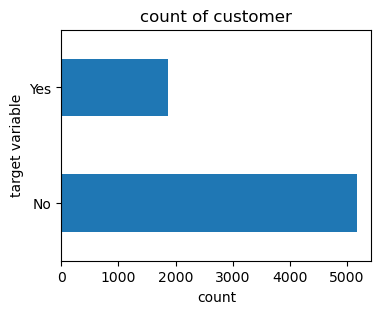

In [9]:
df['Churn'].value_counts().plot(kind='barh', figsize=(4,3))
plt.xlabel("count")
plt.ylabel("target variable")
plt.title("count of customer")

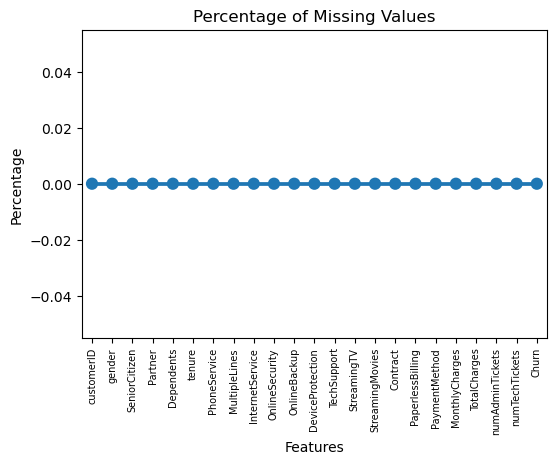

In [10]:
# Plot the dataset missing values %
missing = pd.DataFrame({
    'Features': df.columns,
    'missing_percentage': (df.isnull().sum() * 100 / df.shape[0])}).reset_index(drop=True)
plt.figure(figsize=(6,4))
ax = sns.pointplot(x='Features', y='missing_percentage', data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.ylabel("Percentage")
plt.title("Percentage of Missing Values")
plt.show()

#### Missing Data - Initial Intuition

- Here we don't have missing values

General Thumb rule:
- For features with less missing value we can fill with the mean of the value present or use regression to predict the missing values depending on the feature.
- For feature with very high number of missing values, we can drop the columns as they provide less insight on analysis.
- Although there is no strict rule on what criteria that should be used for deleting columns with high missing values. However, features that have more than 30% to 40% of missing values can be deleted. Also, care must be taken when dealing with dependent columns with null values.

## Data Cleaning

**1. Create a copy of base data for manipulating and processing**

In [11]:
#Create data backup
new_df = df.copy()

**2. Total charges should be numeric amount so we'll convert it to numeric type**

In [12]:
new_df.TotalCharges = pd.to_numeric(new_df.TotalCharges,errors='coerce')
new_df.TotalCharges.isnull().sum()

11

**3. As we can see there are 11 missing values in TotalCharges columns. Lets check these records.**

In [13]:
new_df.loc[new_df['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,0,0,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,5,0,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,Yes,Two year,No,Mailed check,80.85,NaN,0,0,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,1,0,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,0,0,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,0,0,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,0,0,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,5,0,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,0,0,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,No,Two year,No,Mailed check,73.35,NaN,0,0,No


**4. Missing values Treatment**

Since the % of these missing values compare to the total dataset is very low (0.15%) it is safe to ignore them from further processing

In [14]:
#remove missing values
new_df.dropna(how = 'any',inplace = True)

**5. Group customer into bins based on tenure. for tenure < 12 months asign 1-12, for tenure between 1-2yrs assign 13-24months etc**

In [15]:
#Get the max tenure
new_df['tenure'].max()

72

In [16]:
#Group the tenure in a bins of 12 months
labels = ["{}-{}".format(i,i+11) for i in range(1,72,12)]
new_df['tenure_group'] = pd.cut(new_df['tenure'], range(1,80,12), right=False,labels=labels)

In [17]:
new_df['tenure_group'].value_counts()

tenure_group
1-12     2175
61-72    1407
13-24    1024
25-36     832
49-60     832
37-48     762
Name: count, dtype: int64

**6. Remove columns that are unecessary for processing**

In [18]:
#drop columns
new_df.drop(columns=['customerID','tenure'], axis=1, inplace=True)

In [19]:
new_df.shape

(7032, 22)

## Data Exploration

**1.Plot distribution of individual predictor variables**

### Univariate Analysis

In [20]:
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,...,No,One year,No,Mailed check,56.95,1889.50,0,0,No,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes,1-12


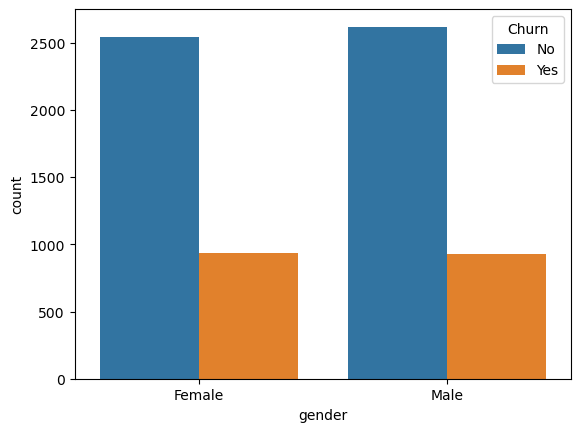

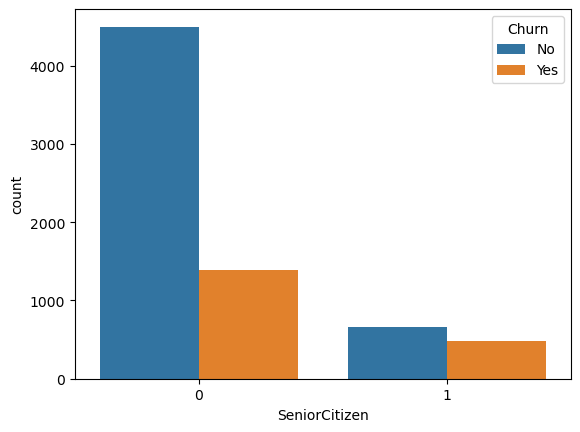

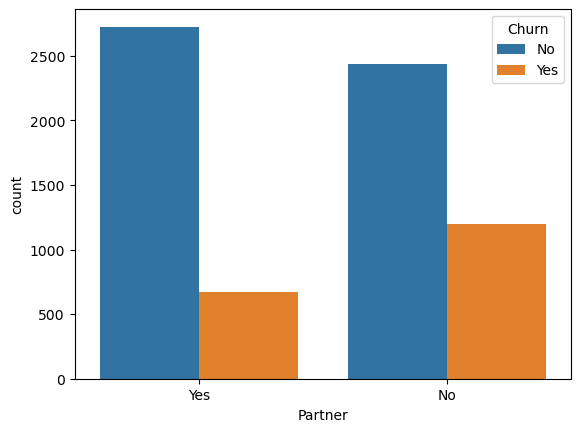

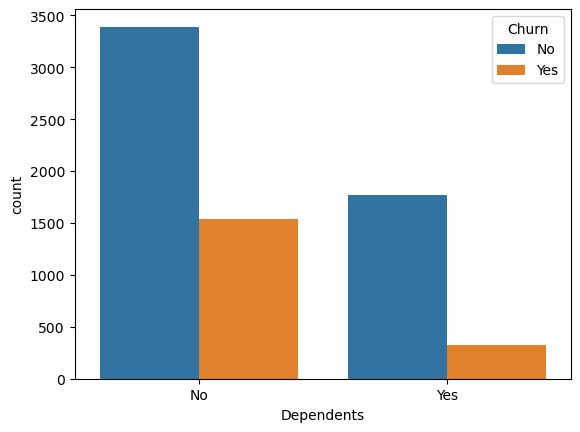

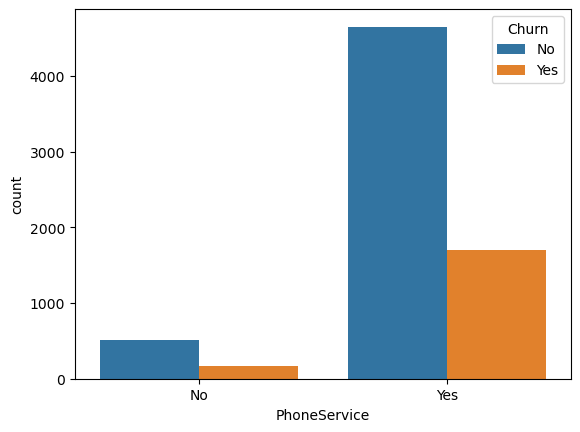

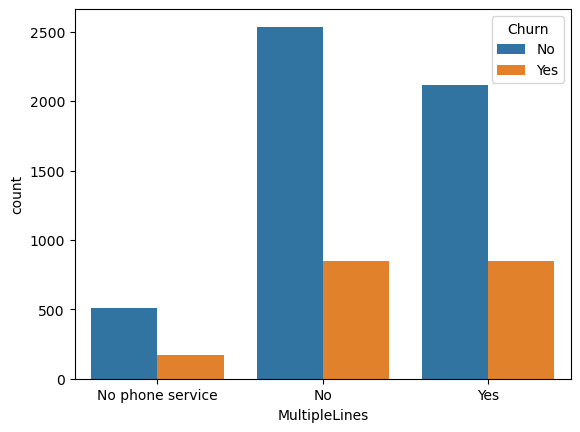

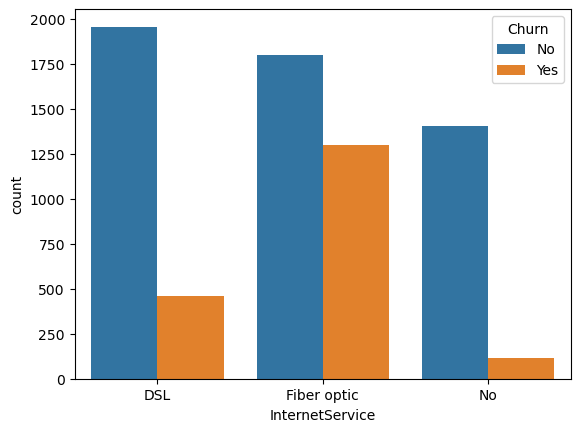

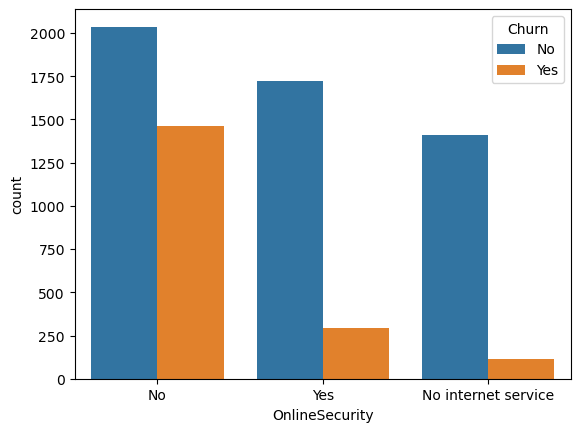

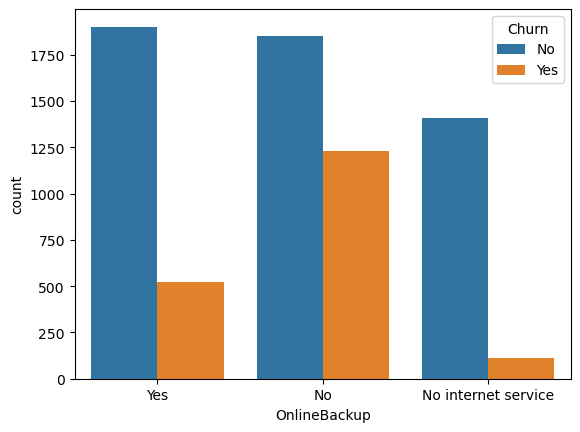

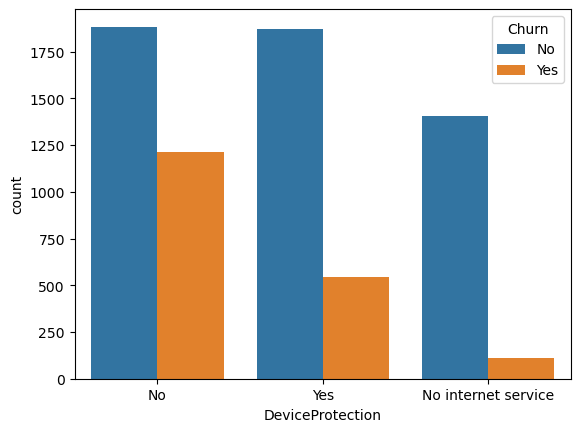

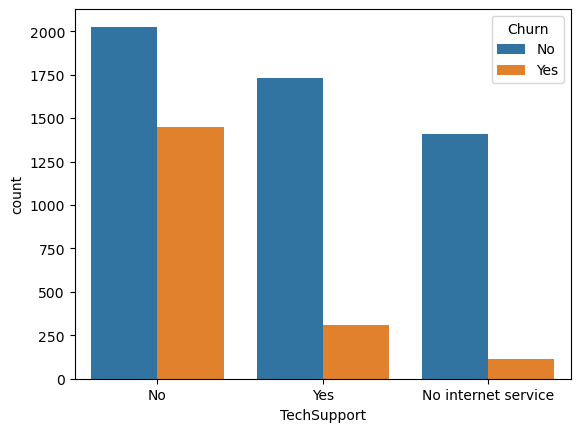

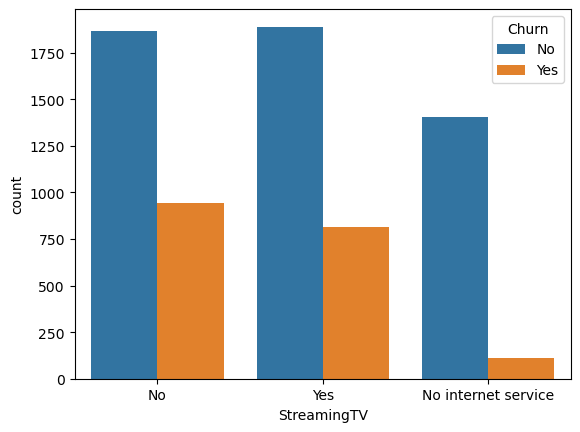

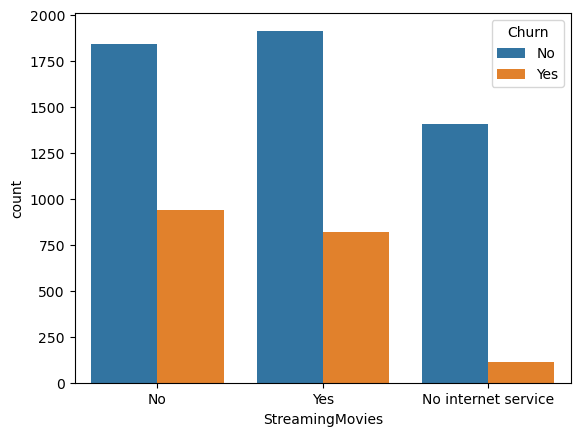

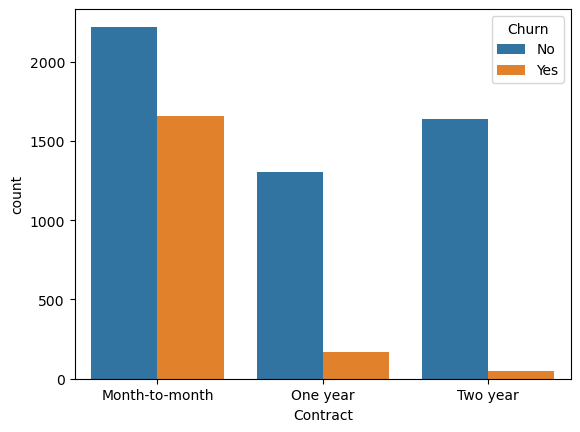

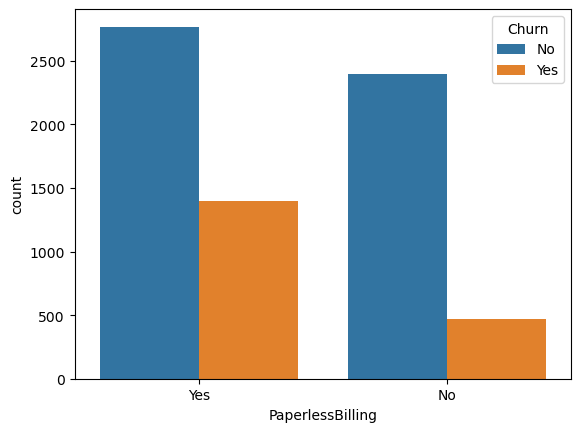

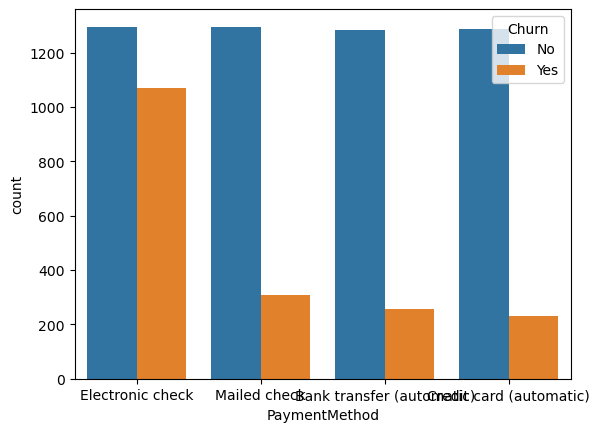

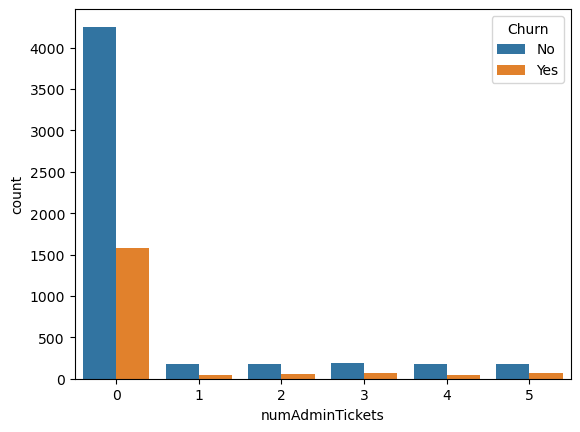

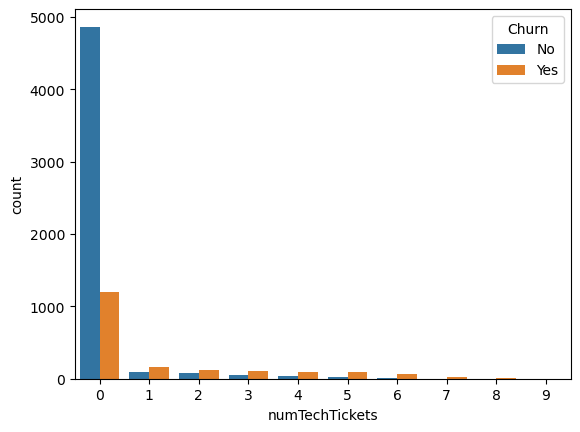

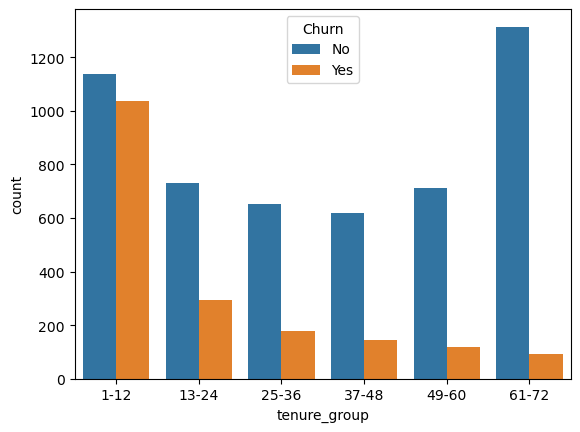

In [21]:
#drop all numerical features and plot the distribution of categorical features
for i, predictor in enumerate(new_df.drop(columns=['Churn','MonthlyCharges','TotalCharges'])):
    plt.figure(i)
    sns.countplot(data= new_df, x = predictor, hue='Churn')

### Numerical Analysis

In [22]:
#gender_counts
new_df.gender.value_counts()

gender
Male      3549
Female    3483
Name: count, dtype: int64

In [23]:
# separte the target variable into two
new_df_target1 = new_df[new_df['Churn']=="Yes"]
new_df_target2 = new_df[new_df['Churn']=="No"]

In [24]:
new_df_target1.gender.value_counts()

gender
Female    939
Male      930
Name: count, dtype: int64

In [25]:
#compare churn rate by payment method
pd.crosstab(new_df.PaymentMethod, new_df.Churn)

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1284,258
Credit card (automatic),1289,232
Electronic check,1294,1071
Mailed check,1296,308


**2. Convert the target variable 'Churn' to a binary numeric variable**

In [26]:
new_df['Churn'] = np.where(new_df['Churn']=='Yes',1,0)

In [27]:
new_df.head(3)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,0,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,...,No,One year,No,Mailed check,56.95,1889.50,0,0,0,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,1,1-12


**3. Convert all categorical variable to dummy variable**

In [28]:
#convert the categorical feaures
new_df_dummies = pd.get_dummies(new_df)
new_df_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29.85,0,0,0,True,False,False,True,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,0,0,False,True,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,0,0,1,False,True,True,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,3,0,False,True,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,0,0,1,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False


**4. Relationship between monthly charges and Total charges**

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


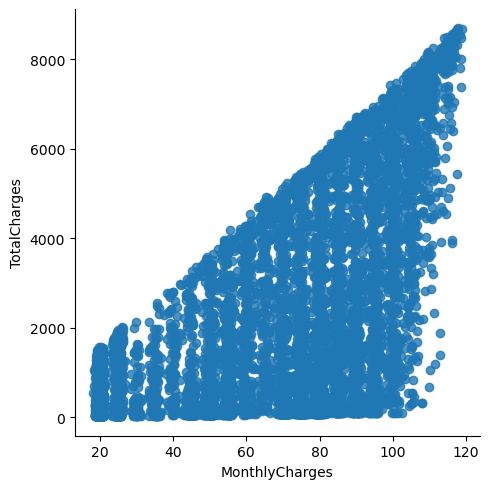

In [29]:
sns.lmplot(data=new_df_dummies,x='MonthlyCharges',y='TotalCharges',fit_reg=False)

In [30]:
new_df_dummies['MonthlyCharges'].corr(new_df_dummies['TotalCharges'])

0.651064803226202

Total charges increases as monthly charges increases - as expected

**5.Visualize Churn by monthly charges and Total charges and Tenure**

Text(0.5, 1.0, 'monthly charge by churn')

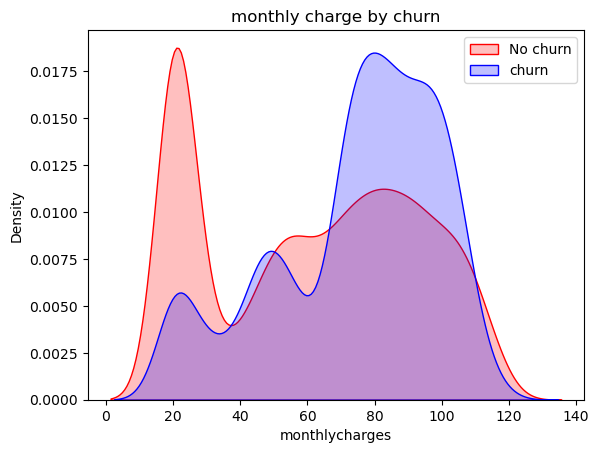

In [31]:
#plot monthly charge by churn
mth = sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies["Churn"]==0)], color="Red", fill=True)
mth = sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies["Churn"]==1)], ax=mth,color="Blue", fill=True)
mth.legend(['No churn','churn'], loc="upper right")
mth.set_xlabel("monthlycharges")
mth.set_ylabel("Density")
mth.set_title("monthly charge by churn")


insight: Churn is high when Monthly charge is high

Text(0.5, 1.0, 'Total charge by churn')

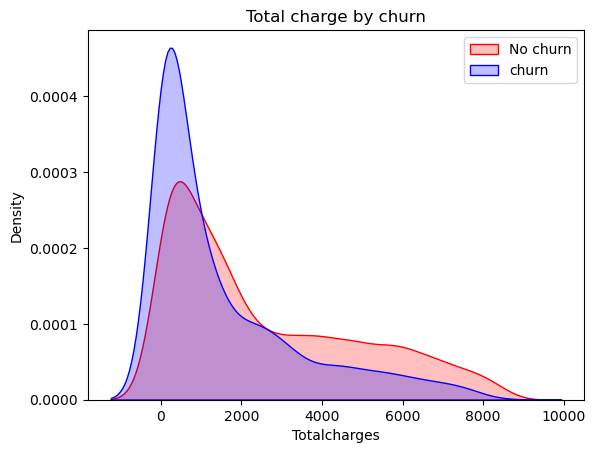

In [32]:
#plot Total charge by churn
tot = sns.kdeplot(new_df_dummies.TotalCharges[(new_df_dummies["Churn"]==0)], color="Red", fill=True)
tot = sns.kdeplot(new_df_dummies.TotalCharges[(new_df_dummies["Churn"]==1)], ax=tot,color="Blue", fill=True)
tot.legend(['No churn','churn'], loc="upper right")
tot.set_xlabel("Totalcharges")
tot.set_ylabel("Density")
tot.set_title("Total charge by churn")


Text(0.5, 1.0, 'Tenure by churn')

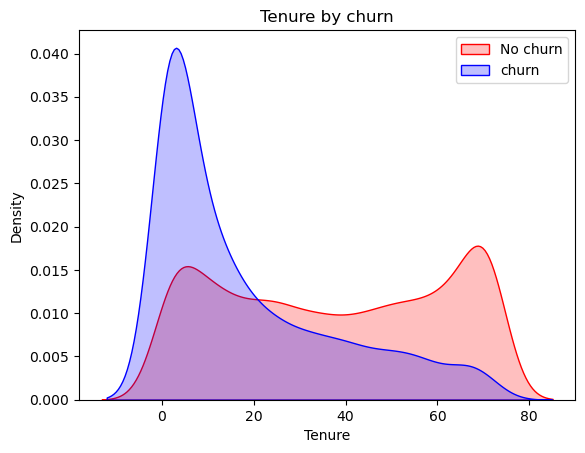

In [33]:
ten = sns.kdeplot(df.tenure[(df["Churn"]=="No")], color="Red", fill=True)
ten = sns.kdeplot(df.tenure[(df["Churn"]=="Yes")], ax=ten, color="Blue", fill=True)
ten.legend(['No churn','churn'], loc="upper right")
ten.set_xlabel("Tenure")
ten.set_ylabel("Density")
ten.set_title("Tenure by churn")


*Insight: As we can see, Customers that are a year older or less are more likely to churn compared to customer that have stayed longer with the company*

**6. Build a correlation of preditors with 'Churn'**

<Axes: >

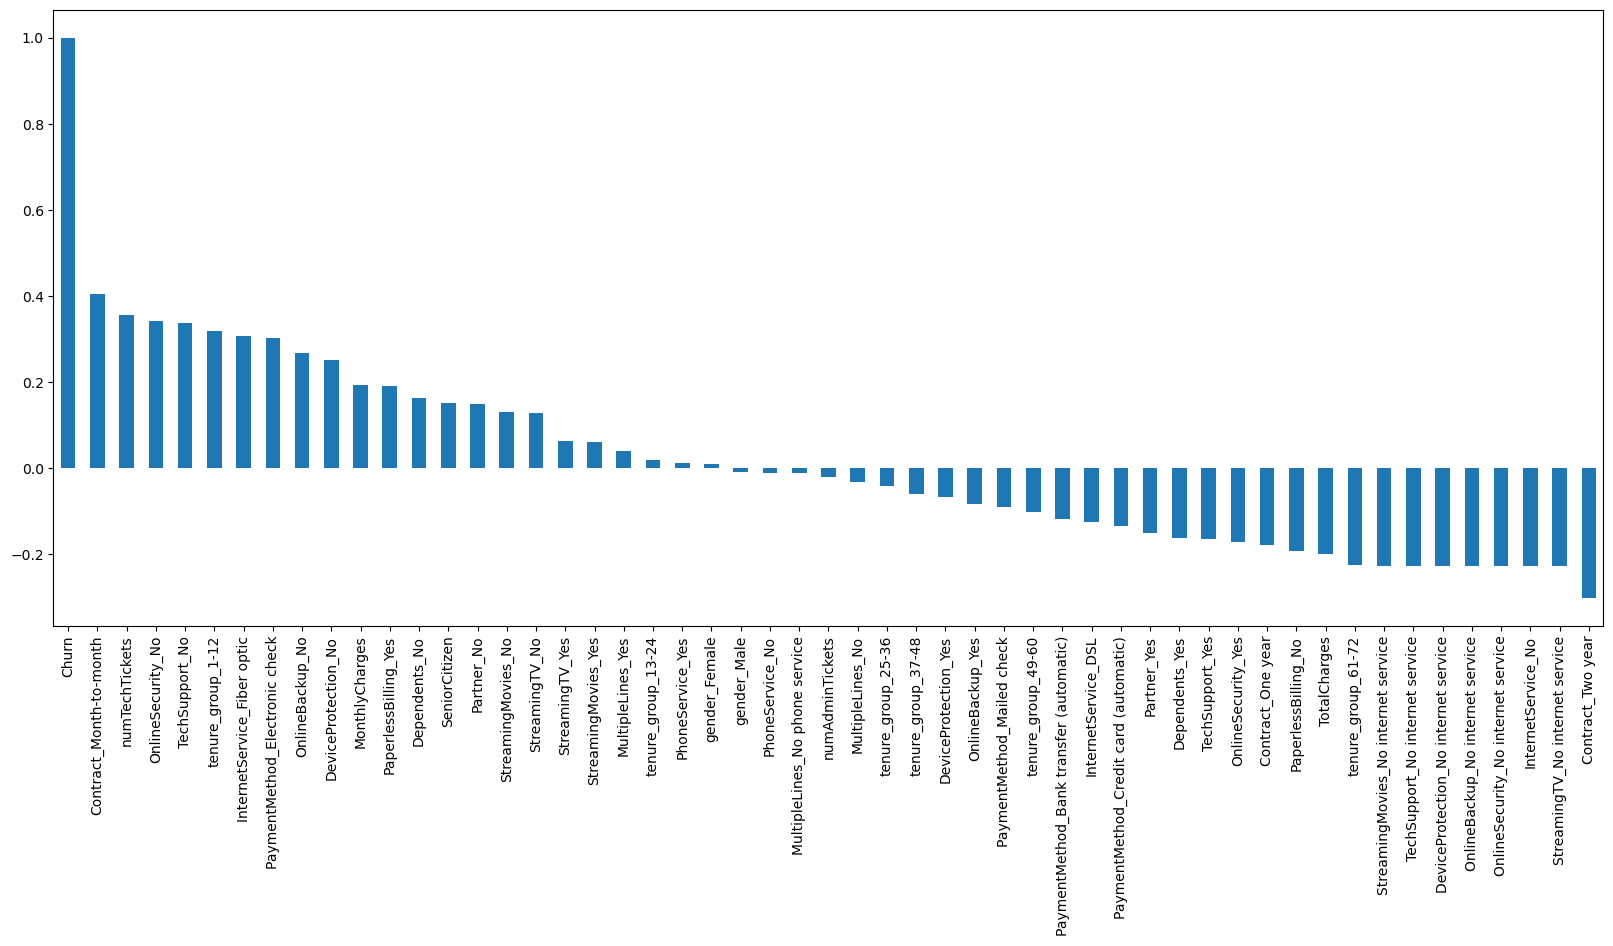

In [34]:
plt.figure(figsize=(20,8))
new_df_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind="bar")

**Derived Insight:**

HIGH CHURN seen in case of **month-to-month, online_security, No_tech_support, fibre_optic_internet,first_year_of_support**

LOW CHURN: seen in case of **Longterm contract,subscription without internet service, and customer engaged for 5+ years**

Factors like **gender, Availability of phone service and multiple lines have no impact on churn**

This is also evident from the heatmap below

<Axes: >

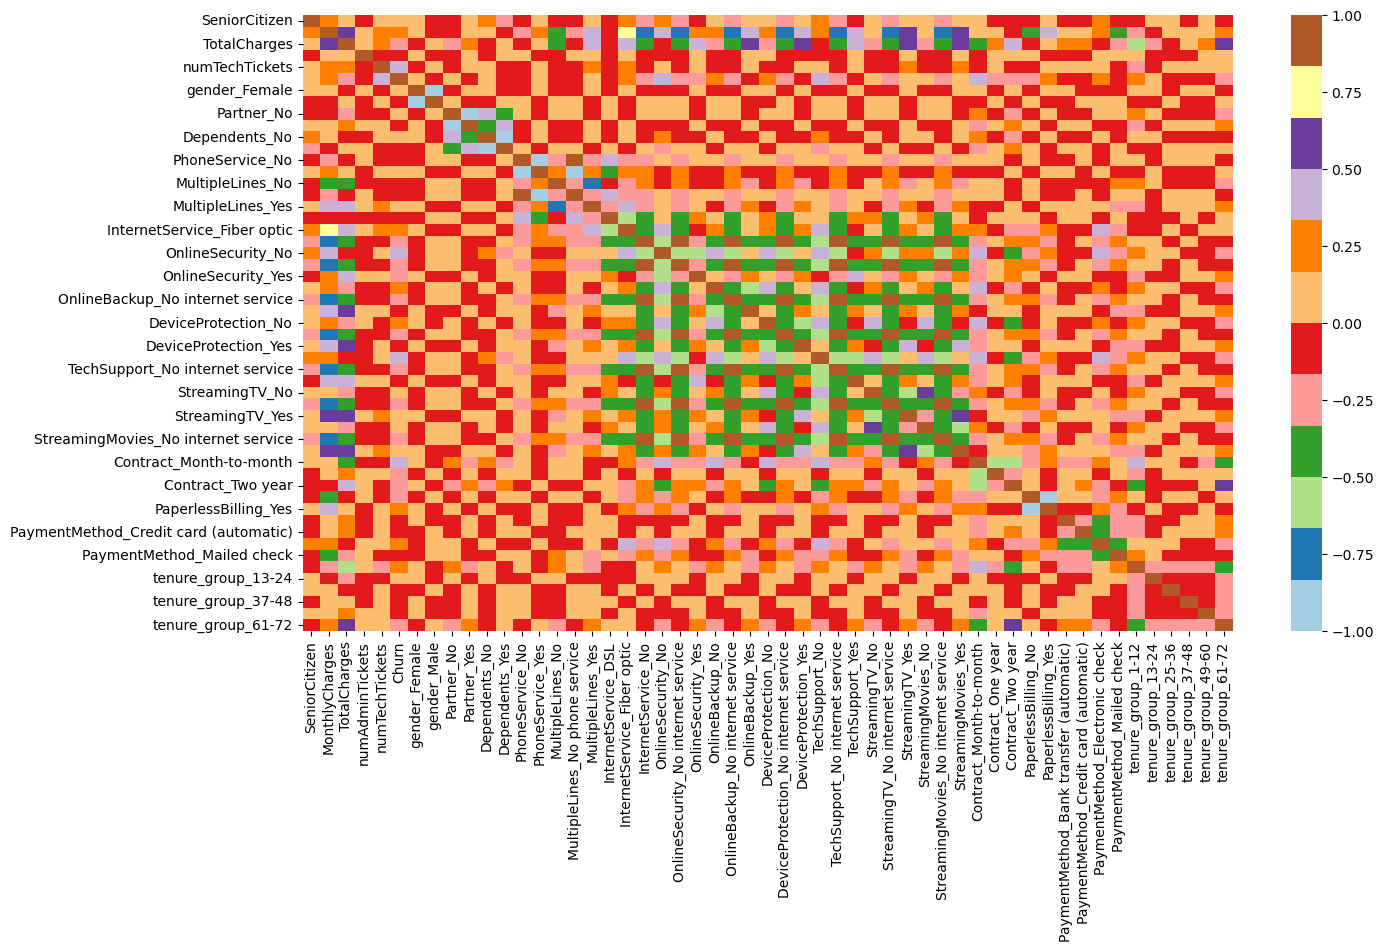

In [35]:
plt.figure(figsize=(15,8))
sns.heatmap(new_df_dummies.corr(), cmap="Paired")

### Bivariate Analysis

In [36]:
len(new_df_target2)

5163

In [39]:
len(new_df_target1)

1869

In [42]:
def uniplot(df,col,title,hue="None"):
    sns.set_style("whitegrid")
    sns.set_context("talk")
    plt.rcParams["axes.labelsize"]=20
    plt.rcParams["axes.titlesize"]=22
    plt.rcParams["axes.titlepad"]=30
    
    temp = pd.Series(data=hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width, 8)
    plt.xticks(rotation = 45)
    plt.yscale("log")
    plt.title(title)
    ax = sns.countplot(data=df,x=col,order=df[col].value_counts().index, hue=hue, palette="bright")
    
    plt.show()

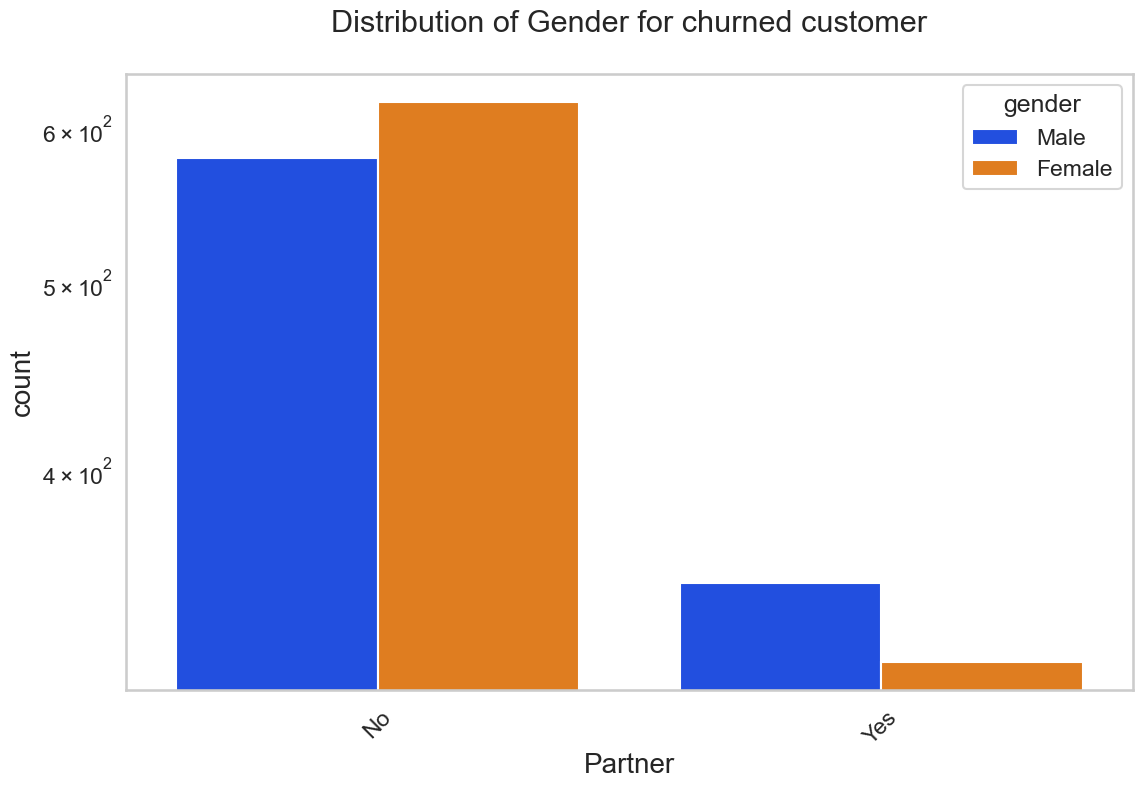

In [43]:
uniplot(new_df_target1,col="Partner",title="Distribution of Gender for churned customer",hue="gender")

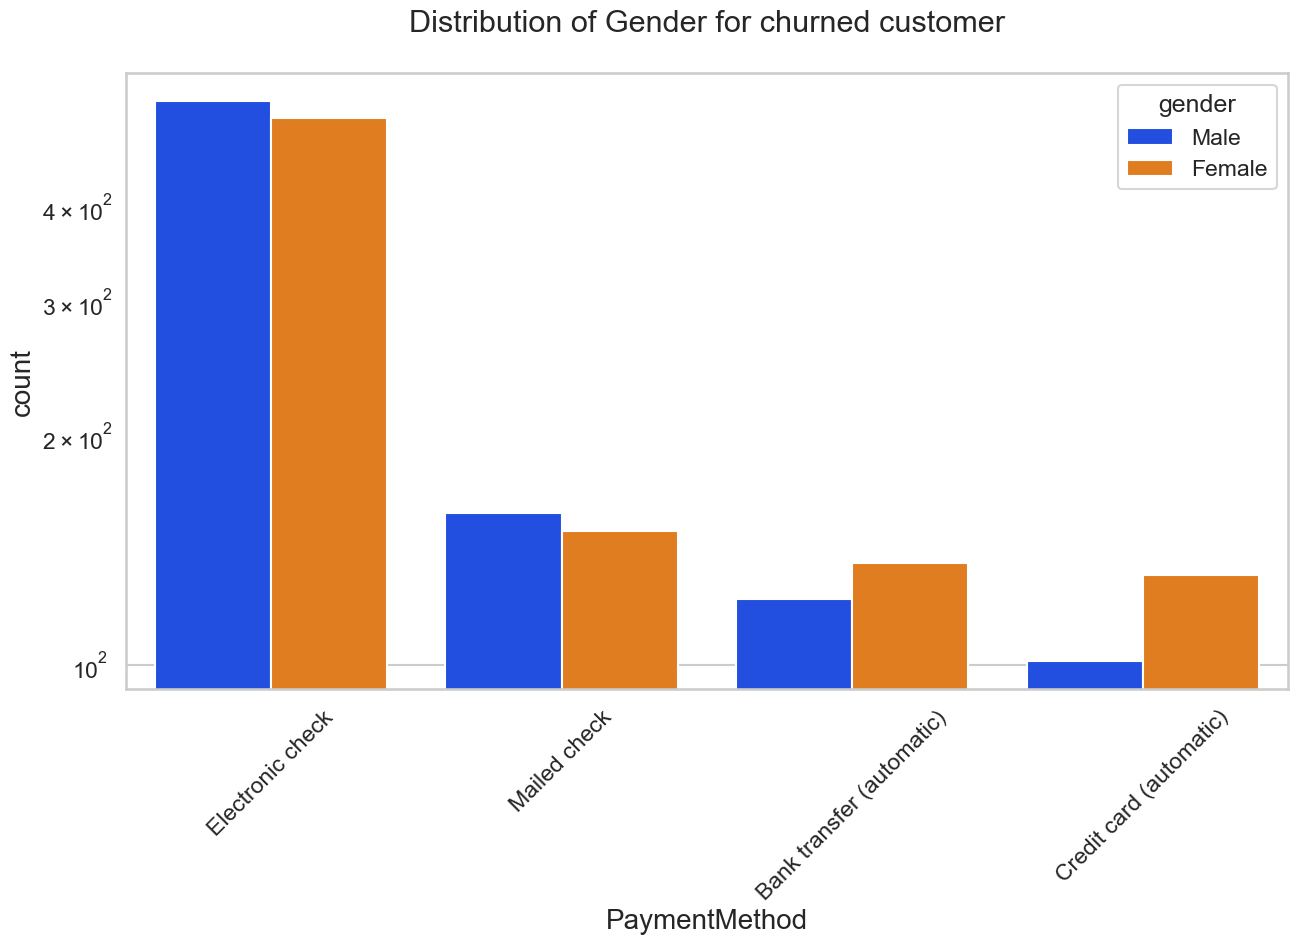

In [44]:
uniplot(new_df_target1,col="PaymentMethod",title="Distribution of Gender for churned customer",hue="gender")

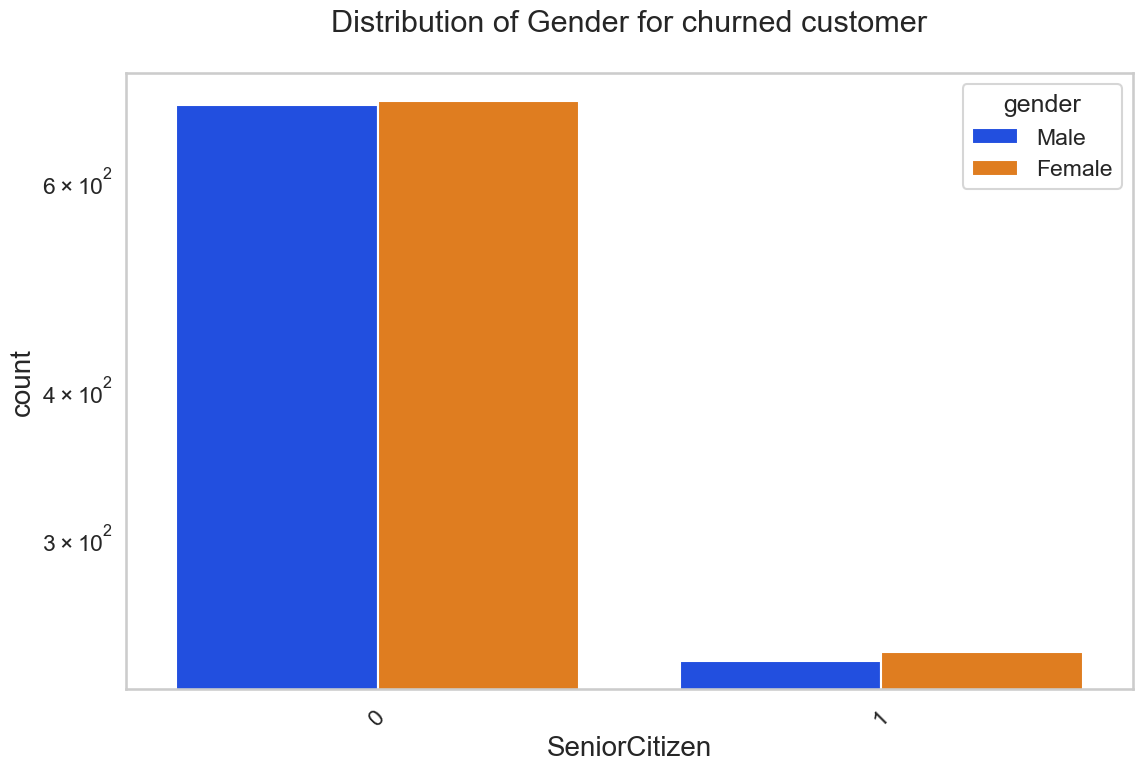

In [45]:
uniplot(new_df_target1,col="SeniorCitizen",title="Distribution of Gender for churned customer",hue="gender")

## Conclusion

Here are some of the quick insight from the data:

- Electronic check are the highest churners
- Non senior citizen are high churn
- Customers that uses little of no internet services are high churners
- Contract type- monthly customer are more likely to churn because of no contract terms as they are free customers.